<h1>Analyzing Titanic Dataset</h1>

In [1]:
#import the required libraries 

import pandas as pd
import numpy as np
import scipy.stats as stats

df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h1>Data pre-processing and EDA<h1>

In [4]:
print("Train Shape:",df.shape)

print("Test Shape:",test_df.shape)


Train Shape: (891, 12)
Test Shape: (418, 11)


In [5]:
#null values in train.csv
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#null values in test.csv
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
#get info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<h2>Info. Retrived</h2>

    Survived: 0 = No, 1 = Yes
    pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
    sibsp: # of siblings / spouses aboard the Titanic
    parch: # of parents / children aboard the Titanic
    ticket: Ticket number
    cabin: Cabin number
    embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


In [9]:
#get the statistical description of train data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#get the statistical description of test data
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200



   <ul> 
    <li>Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).</li>
    <li>Survived is a categorical feature with 0 or 1 values.</li>
    <li>Around 38% samples survived representative of the actual survival rate at 32%.</li>
   <li> Most passengers (> 75%) did not travel with parents or children.</li>
   <li> Nearly 30% of the passengers had siblings and/or spouse aboard.</li>
   <li> Fares varied significantly with few passengers (less than 1%) paying as high as $512.</li>
   <li> Few elderly passengers (less than 1%) within age range 65-80.</li>
  </ul>


<h1>Now we will perform Data visualization





</h1>





In [11]:
import matplotlib.pyplot as plt # Plot the graphes
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots


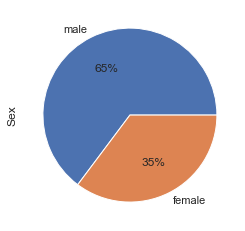

In [21]:

df['Sex'].value_counts().plot.pie(autopct='%1.0f%%')

# Unsquish the pie.

plt.gca().set_aspect('equal')



<h3>The Pie char shows that their were 65% of male and 35% of female on the ship</h3>

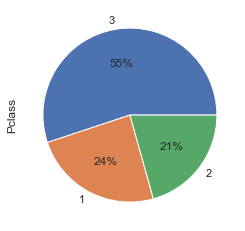

In [19]:
# Class plot

df['Pclass'].value_counts().plot.pie(autopct='%1.0f%%')

# Unsquish the pie.

plt.gca().set_aspect('equal')



<h3>More passengers are from class Three i.e. 55% of the total people onboarded</h3>

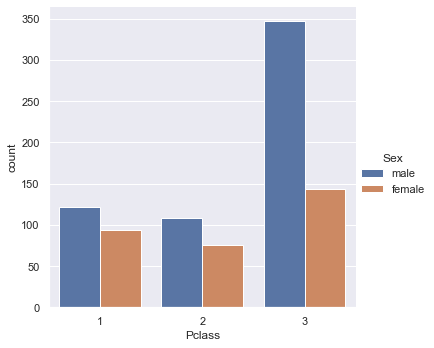

In [29]:
sns.factorplot('Pclass',data=df,hue='Sex',kind='count')


This gives us an insight that there are quite a few males than females in 3rd class !!!!!!!!!

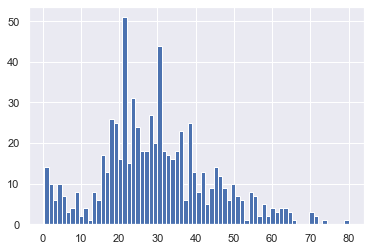

In [15]:
#Now let us look at the ages of the passengers

titanic_df.groupby(['Age']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');


df['Age'].hist(bins=70)

From this we get the insight that their are more people of age group 20-30

And lowest no. of people in age group of 70-80

<h2>Bar Chart for categorical value</h2>


    Pclass
    Sex
    SibSp ( # of siblings and spouse)
    Parch ( # of parents and children)
    Embarked
    Cabin


In [38]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    data = pd.DataFrame([survived,dead])
    data.index = ['Survived','Dead']
    data.plot(kind='pie',stacked=True, figsize=(10,5),subplots=True,autopct='%1.0f%%')

Survived :
 female    233
male      109
Name: Sex, dtype: int64
Dead:
 male      468
female     81
Name: Sex, dtype: int64


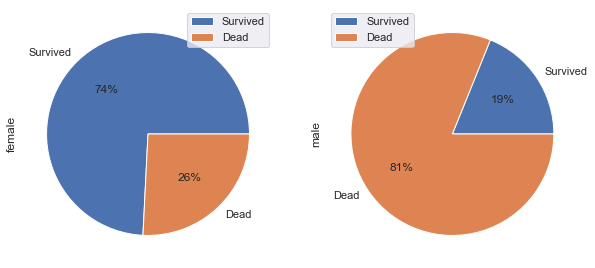

In [39]:
# Bar chart for Sex

bar_chart('Sex')
print("Survived :\n",df[df['Survived']==1]['Sex'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Sex'].value_counts())

<h3>The Chart confirms Women more likely survivied than Men. Survived :
 female    233
male      109</h3>
<h3>Out of total females 74% survived and 26 % dead</h3>
<h3>Out of total males 81% are dead and 19 % survived</h3>

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


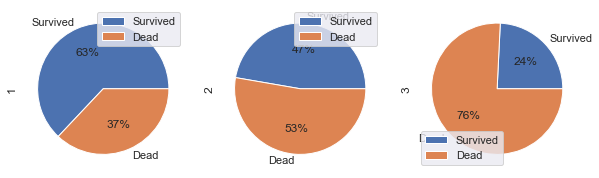

In [40]:
#bar chart  of Pclass
bar_chart('Pclass')
print("Survived :\n",df[df['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Pclass'].value_counts())

<h3>The Chart confirms 1st class more likely survivied than other classes.Survived :first 63%
second 47%
third 24% </h3>
<h3>The Chart confirms 3rd class more likely dead than other classes. Dead:third 76%
second 53%
first37%</h3>

Survived :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


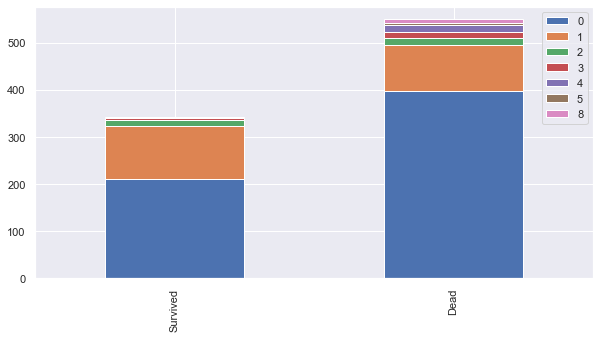

In [19]:
#bar chart siblings and spouse
bar_chart('SibSp')
print("Survived :\n",df[df['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",df[df['Survived']==0]['SibSp'].value_counts())

<h3>The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived.</h3>
<h3>The Chart confirms a person aboarded without siblings or spouse more likely dead</h3>

Survived :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


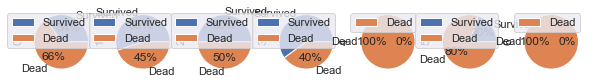

In [55]:
#bar chart for parents and children

bar_chart('Parch')
print("Survived :\n",df[df['Survived']==1]['Parch'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Parch'].value_counts())



<h3>The Chart confirms a person aboarded with more than 2 parents or children more likely survived.</h3>
<h3>The Chart confirms a person aboarded alone more likely dead</h3>

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


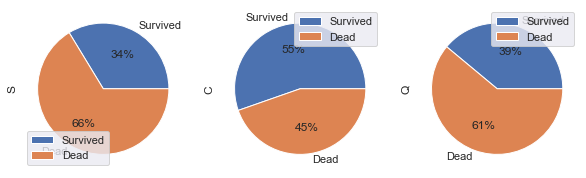

In [44]:
# bar chart for embarked 
bar_chart('Embarked')
print("Survived :\n",df[df['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Embarked'].value_counts())

<h3>The Chart confirms a person aboarded from C slightly more likely survived i.e 55%</h3>
<h3>The Chart confirms a person aboarded from S more likely dead,i.e 66% dead</h3>
<h3>The Chart confirms a person aboarded from Q more likely dead, 61% dead</h3>

In [23]:

#replacing NAN of age with mean 
avg_age = df["Age"].astype("float").mean(axis=0)
df["Age"].replace(np.nan, avg_age, inplace=True)
avg_age1 = test_df["Age"].astype("float").mean(axis=0)
test_df["Age"].replace(np.nan, avg_age1, inplace=True)


<H1> Age visualization:</H1>

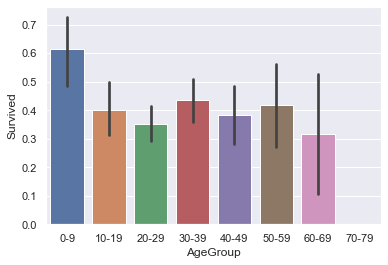

In [60]:
#sort the ages into logical categories
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['AgeGroup'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=age_labels)
test_df['AgeGroup'] = pd.cut(test_df.Age, range(0, 81, 10), right=False, labels=age_labels)
;

#draw a bar plot of Age vs. survival

sns.barplot(x="AgeGroup", y="Survived",data=df)
plt.show()


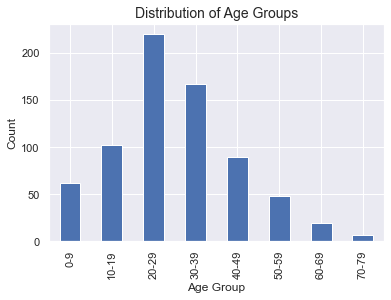

In [62]:


df.groupby(['AgeGroup']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');



<h3>People ages 0-9 were most likely to survive</h3>

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39


In [26]:
df = df.drop(['AgeGroup'], axis = 1) 

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
test_df = test_df.drop(['AgeGroup'], axis = 1) 

<h1>Data Preparation</h1>

<h2>checking correlations with Heatmap</h2>

In [29]:
dataset = pd.concat([df, test_df], sort=False, ignore_index=True)


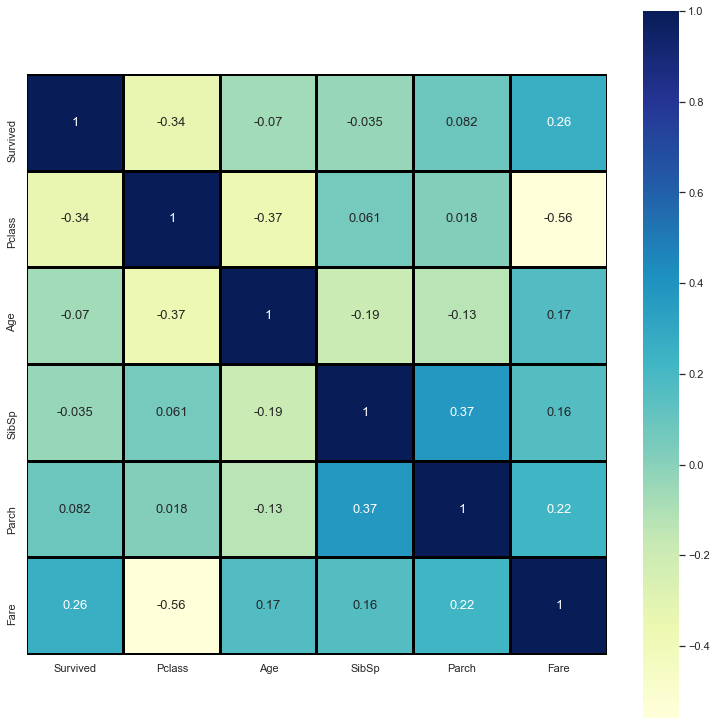

In [30]:
fig, axs = plt.subplots(nrows=1, figsize=(13, 13))
sns.heatmap(dataset.drop(['PassengerId'], axis=1).corr(), annot=True, square=True, cmap='YlGnBu', linewidths=2, linecolor='black', annot_kws={'size':13})

<ul><li><h3>We can clearly see that the more money the passenger spends the higher chance of survival.</h3></li>
<li><h3>According to the heatmap, 'Pclass' is the most correlated feature to 'Fare', with a correlation of -0.56.</h3></li> <li><h3>'Family Size' ('Parch' + 'SibSp') is also related to 'Fare'</h3></ul></li>

In [31]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [33]:
#we will replace the null values of embarked with most common one
common_value = 'S'
dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [34]:
#Cabin has too many missing values (77.5%) so we will eventually drop this feature
dataset = dataset.drop(['Cabin'], axis = 1)

In [35]:
#fare has only one missing data so we can just drop that perticular row

dataset.dropna(subset=["Fare"], axis=0, inplace=True)

In [36]:
dataset.isnull().sum()

PassengerId      0
Survived       417
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [37]:
#Ticket' is a pretty useless feature so we decide to drop it
dataset = dataset.drop(['Ticket'], axis = 1)

<h3> converting string to numeric data</h3>


In [38]:

# Replace 'Male' with 0, 'Female' with 1
sex_mapping = {'male':0, 'female':1}
dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [39]:
#Convert ‘Embarked’ feature into numeric.
ports = {"S": 0, "C": 1, "Q": 2}
dataset['Embarked'] = dataset['Embarked'].map(ports)

In [40]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
# extract titles
dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# replace titles with a more common title or as Rare
dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
# convert titles into numbers
dataset['Title'] = dataset['Title'].map(titles)
# filling NaN with 0, to get safe
dataset['Title'] = dataset['Title'].fillna(0)

In [41]:
dataset = dataset.drop(['Name'], axis = 1)

In [42]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,7.2500,0,1
1,2,1.0,1,1,38.0,1,0,71.2833,1,3
2,3,1.0,3,1,26.0,0,0,7.9250,0,2
3,4,1.0,1,1,35.0,1,0,53.1000,0,3
4,5,0.0,3,0,35.0,0,0,8.0500,0,1


In [43]:
dataset.head(100)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.000000,1,0,7.2500,0,1
1,2,1.0,1,1,38.000000,1,0,71.2833,1,3
2,3,1.0,3,1,26.000000,0,0,7.9250,0,2
3,4,1.0,1,1,35.000000,1,0,53.1000,0,3
4,5,0.0,3,0,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...
95,96,0.0,3,0,29.699118,0,0,8.0500,0,1
96,97,0.0,1,0,71.000000,0,0,34.6542,1,1
97,98,1.0,1,0,23.000000,0,1,63.3583,1,1
98,99,1.0,2,1,34.000000,0,1,23.0000,0,3


<h3>Split dataset back into train and test variables.</h3>

In [44]:
# Splitting dataset into train
df = dataset[:len(df)]

# Splitting dataset into test
test_df = dataset[len(df):]

# Drop labels 'Survived' because there shouldn't be a Survived column in the test data
test_df.drop(labels=['Survived'], axis=1, inplace=True)

C:\ProgramData\Anaconda2\envs\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,7.2500,0,1
1,2,1.0,1,1,38.0,1,0,71.2833,1,3
2,3,1.0,3,1,26.0,0,0,7.9250,0,2
3,4,1.0,1,1,35.0,1,0,53.1000,0,3
4,5,0.0,3,0,35.0,0,0,8.0500,0,1


In [46]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
891,892,3,0,34.5,0,0,7.8292,2,1
892,893,3,1,47.0,1,0,7.0000,0,3
893,894,2,0,62.0,0,0,9.6875,2,1
894,895,3,0,27.0,0,0,8.6625,0,1
895,896,3,1,22.0,1,1,12.2875,0,3


In [47]:
#We see that Survived is a 'float' type, so we must change it to an 'int' type.
df.Survived = df.Survived.astype('int')

C:\ProgramData\Anaconda2\envs\python38\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [48]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,3
2,3,1,3,1,26.0,0,0,7.9250,0,2
3,4,1,1,1,35.0,1,0,53.1000,0,3
4,5,0,3,0,35.0,0,0,8.0500,0,1


In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
X_train = df.drop("Survived", axis=1)
Y_train = df["Survived"]
X_test  = test_df

In [52]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg_predict = lin_reg.predict(X_test)

In [53]:
print(lin_reg_predict)

[ 0.12961397  0.52626115  0.12952613  0.09913989  0.63508469  0.17179426
  0.66552643  0.1781939   0.78050902  0.02825486  0.08052606  0.30677451
  1.00496235  0.00387181  0.85984502  0.85390382  0.28126816  0.16811157
  0.55334709  0.63028827  0.25498213  0.41740884  0.99316164  0.46846497
  0.90141    -0.08198193  0.97420302  0.15978977  0.33710929  0.01168785
  0.07625542  0.1675645   0.54528872  0.56204551  0.39322912  0.18207093
  0.59164221  0.64357966  0.1108169   0.10725954  0.03820059  0.39466975
  0.02088708  0.83256618  0.8663209   0.10997055  0.35079402  0.15321316
  0.88861148  0.58246507  0.39155487  0.29100885  0.66297792  0.81244199
  0.27310498  0.27327305  0.05433553  0.10984995  0.02875556  1.03951279
  0.15450974  0.22603267  0.14887012  0.71024006  0.73163334  0.8354933
  0.73259091  0.31034752  0.4281172   0.76555191  0.69914208  0.13227877
  0.59874594  0.44159348  1.01720691  0.5201551   0.08077703  0.73963396
  0.23693059  0.69916476  0.42082039  0.24109886  0.